<a href="https://colab.research.google.com/github/John-Frye/housing_development_in_baltimore/blob/main/geospatial_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Geospatial Analysis with Baltimore Housing Development Data
*   Housing data and neighborhood shape data downloaded from Baltimore Neighborhood Indicators Alliance and Opportunity Atlas  

# import libraries

In [1]:
# import library for many geopython libraries 
!apt install gdal-bin python-gdal python3-gdal 

# Install rtree - Geopandas requirment
!apt install python3-rtree

# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install descartes - Geopandas requirment
!pip install descartes 

# Install Folium for Geographic data visualization
!pip install folium

# Install mapclassify for geospatial data viz
!pip install mapclassify

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [2]:
# import libraries for data analysis
import pandas as pd

# for geo analysis
import geopandas as gpd
import mapclassify

# for data viz
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# to export files
from google.colab import files

# import data

In [15]:
# neighborhood clusters 
df_clusters = pd.read_csv("https://raw.githubusercontent.com/John-Frye/housing_development_in_baltimore/main/Clusters1.csv")

In [16]:
# preview data 
df_clusters.head(10)

,Neighborhood Name,Cluster Number
0,Mount Washington/Coldspring,1
1,North Baltimore/Guilford/Homeland,1
2,Fells Point,1
3,Cross-Country/Cheswolde,1
4,Canton,1
5,Morrell Park/Violetville,1
6,Canton,1
7,Canton,1
8,Medfield/Hampden/Woodberry/Remington,1
9,Lauraville,1


In [17]:
# drop duplicated data points 
df_clusters = df_clusters.drop_duplicates(subset = "Neighborhood Name", keep = "first")

In [18]:
# preview cleaned dataset
df_clusters.head(10)

,Neighborhood Name,Cluster Number
0,Mount Washington/Coldspring,1
1,North Baltimore/Guilford/Homeland,1
2,Fells Point,1
3,Cross-Country/Cheswolde,1
4,Canton,1
5,Morrell Park/Violetville,1
8,Medfield/Hampden/Woodberry/Remington,1
9,Lauraville,1
10,Brooklyn/Curtis Bay/Hawkins Point,1
15,South Baltimore,1


In [19]:
# check data types 
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 38
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Neighborhood Name  19 non-null     object
 1   Cluster Number     19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 456.0+ bytes


In [20]:
# import geospatial data 
gdf_neighborhoods = gpd.read_file("CSA_NSA_Tracts.shp")

In [21]:
gdf_neighborhoods.head(15)

,Community,Neigh,Tracts,geometry
0,Allendale/Irvington/S. Hilton,"Allendale, Carroll-South Hilton, Gwynns Falls,...","280404, 200701, 200600, 200702, 200800, 250102","POLYGON ((1409361.428 586287.858, 1409360.989 ..."
1,Beechfield/Ten Hills/West Hills,"Beechfield, Hunting Ridge, Ten Hills, Tremont,...","280403, 280401, 250101","POLYGON ((1398704.271 595723.916, 1398744.322 ..."
2,Belair-Edison,"Belair-Edison, Clifton Park, Four By Four, May...","260301, 080102, 080101, 260302","POLYGON ((1434651.402 604737.873, 1434694.129 ..."
3,Brooklyn/Curtis Bay/Hawkins Point,"Brooklyn, Curtis Bay, Fairfield Area, Hawkins ...","250500, 250600, 250401, 250402","POLYGON ((1445536.369 565601.253, 1445537.625 ..."
4,Canton,"Canton, Patterson Park","010400, 010300, 010100","POLYGON ((1433652.911 589454.698, 1433658.798 ..."
5,Cedonia/Frankford,"Cedonia, Frankford, Cedmont, Parkside","260203, 260101, 260102, 260201, 260202","POLYGON ((1445361.647 606529.226, 1445268.320 ..."
6,Cherry Hill,"Cherry Hill, Middle Branch/Reedbird Parks","250207, 250204, 250203","POLYGON ((1419000.802 580539.195, 1420922.274 ..."
7,Chinquapin Park/Belvedere,"Cameron Village, Chinquapin Park, Lake Walker,...","270804, 270805","POLYGON ((1426884.858 614790.046, 1426840.248 ..."
8,Claremont/Armistead,"Armistead Gardens, Claremont-Freedom (now Orch...","260303, 260401, 260403, 260402","POLYGON ((1445394.200 598904.861, 1445351.843 ..."
9,Clifton-Berea,"Berea, Biddle Street, Broadway East, Darley Pa...","080500, 080302, 080200, 080301, 080400","POLYGON ((1429896.563 600546.598, 1430462.930 ..."


In [ ]:
gdf_neighborhoods.tail()

In [28]:
# look at info 
gdf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Community  56 non-null     object  
 1   Neigh      55 non-null     object  
 2   Tracts     56 non-null     object  
 3   geometry   56 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.9+ KB


# merge polygon shape data onto cluster data


In [29]:
# convert geo df fips column into an integer so we can merge later
gdf_neighborhoods["Community"] = gdf_neighborhoods["Community"].astype(int)

ValueError: ignored

In [31]:
# creating a new gdf of polygon and cluster data
# merge state data onto the clusters data
gdf_neighborhoods = gdf_neighborhoods.merge(df_clusters,
                                how = "right",
                                left_on = "Community",
                                right_on = "Neighborhood Name")

In [35]:
gdf_neighborhoods.head()

,Community,Neigh,Tracts,geometry,Neighborhood Name,Cluster Number
0,Mount Washington/Coldspring,"Coldspring, Mt. Washington, Sabina-Mattfeldt","271501, 130805","POLYGON ((1412162.168 611520.652, 1412108.991 ...",Mount Washington/Coldspring,1
1,North Baltimore/Guilford/Homeland,"Bellona-Gittings, Blythewood, Cedarcroft, Guil...","120100, 271200, 271101, 271102","POLYGON ((1422647.603 615297.695, 1422652.589 ...",North Baltimore/Guilford/Homeland,1
2,Fells Point,"Butcher's Hill, Fells Point, Upper Fells Point","020200, 020300, 020100, 010500","POLYGON ((1429364.422 586848.867, 1428429.100 ...",Fells Point,1
3,Cross-Country/Cheswolde,"Cheswolde, Cross Country","272003, 272005, 272004","POLYGON ((1404761.081 618409.617, 1404629.250 ...",Cross-Country/Cheswolde,1
4,Canton,"Canton, Patterson Park","010400, 010300, 010100","POLYGON ((1433652.911 589454.698, 1433658.798 ...",Canton,1


# create a static chloropleth map

In [36]:
# convert geopandas df to geoJSON format 
geojson_neighborhoods = gdf_neighborhoods.__geo_interface__

In [ ]:
# preview geoJSON file 
geojson_neighborhoods

Text(0.5, 1.0, 'Neighborhoods By Cluster')

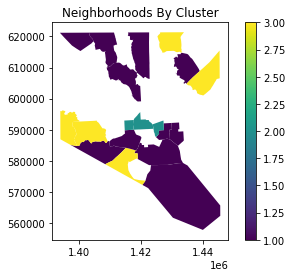

In [45]:
# plot a static choropleth map

# define both the plot and the legend
fig, ax = plt.subplots(1, 1)
# plot map
gdf_neighborhoods.plot(column="Cluster Number", 
                   ax=ax, 
                   legend=True)
# add title
plt.title("Neighborhoods By Cluster")

Text(0.5, 1.0, 'Neighborhoods By Cluster')

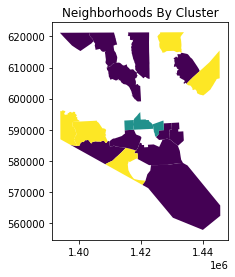

In [48]:
# we can also remove the gradient color legend
# define both the plot and the legend
fig, ax = plt.subplots(1, 1)
# plot map
gdf_neighborhoods.plot(column="Cluster Number", 
                   ax=ax, 
                   legend=False)
# add title
plt.title("Neighborhoods By Cluster")